<a href="https://colab.research.google.com/github/hduongck/AI-ML-Learning/blob/master/2019%20Fastai%20Deep%20Learning/2019_Deep_Learning_3_Planet_Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Video](https://youtu.be/PW2HKkzdkKY) / [Lesson Forum](https://forums.fast.ai/t/lesson-3-official-resources-and-updates/29732)

A quick correction on citation. This chart originally came from Andrew Ng's excellent machine learning course on Coursera. Apologies for the incorrect citation.

![alt text](https://github.com/hiromis/notes/raw/master/lesson3/2.png)

[Andrew Ng's machine learning course on Coursera](https://www.coursera.org/learn/machine-learning) is great. In some ways, it's a little dated but a lot of the content is as appropriate as ever and taught in a bottom-up style. So it can be quite nice to combine it with our top down style and meet somewhere in the middle.

Also, if you are interested in machine learning foundations, you should check out our [machine learning course](https://course.fast.ai/ml)as well. It is about twice as long as this deep learning course and takes you much more gradually through some of the foundational stuff around validation sets, model interpretation, how PyTorch tensor works, etc. I think all these courses together, if you really dig deeply into the material, do all of them. I know a lot of people who have and end up saying "oh, I got more out of each one by doing a whole lot". Or you can backwards and forwards to see which one works for you.

We started talking about deploying your web app last week. One thing that's going to make life a lot easier for you is that [https://course-v3.fast.ai/](https://course-v3.fast.ai/) has a production section where right now we have one platform but more will be added showing you how to deploy your web app really easily. When I say easily, for example, [here is how to deploy on Zeit](https://course-v3.fast.ai/deployment_zeit.html) guide created by Navjot.

![alt text](https://github.com/hiromis/notes/blob/master/lesson3/3.png?raw=true)

As you can see, it's just a page. There's almost nothing to and it's free. It's not going to serve 10,000 simultaneous requests but it'll certainly get you started and I found it works really well. It's fast. Deploying a model doesn't have to be slow or complicated anymore. And the nice thing is, you can use this for a Minimum Viable Product (MVP). If you do find it's starting to get a thousand simultaneous requests, then you know that things are working out and you can start to upgrade your instance types or add to a more traditional big engineering approach. If you actually use this starter kit, it will create my teddy bear finder for you. So the idea is, this template is as simple as possible. So you can fill in your own style sheets, your own custom logic, and so forth. This is designed to be a minimal thing, so you can see exactly what's going on. The backend is a simple REST style interface that sends back JSON and the frontend is a super simple little Javascript thing. It should be a good way to get a sense of how to build a web app which talks to a PyTorch model.

**Examples of web apps people have built during the week** [3:36](https://youtu.be/PW2HKkzdkKY?t=216)

Edward Ross built the what Australian car is that? app

![link text](https://github.com/hiromis/notes/raw/master/lesson3/4.png?raw=true)

I thought it was interesting that Edward said on the forum that building this app was actually a great experience in terms of understanding how the model works himself better. It's interesting that he's describing trying it out on his phone. A lot of people think "Oh, if I want something on my phone, I have to create some kind of mobile TensorFlow, ONNX, whatever tricky mobile app"﹣you really don't. You can run it all in the cloud and make it just a web app or use some kind of simple little GUI frontend that talks to a rest backend. It's not that often that you'll need to actually run stuff on the phone. So this is a good example of that.


![](https://github.com/hiromis/notes/raw/master/lesson3/5.png?raw=true)

[Guitar Classifier](https://forums.fast.ai/t/share-your-work-here/27676/400) by Christian Werner

![](https://github.com/hiromis/notes/raw/master/lesson3/6.png?raw=true)

[Healthy or Not](https://forums.fast.ai/t/share-your-work-here/27676/340)! by Nikhil Utane

![](https://github.com/hiromis/notes/blob/master/lesson3/7.png?raw=true)

[Hummingbird Classifier](https://forums.fast.ai/t/share-your-work-here/27676/333) by Nissan Dookeran

![](https://github.com/hiromis/notes/blob/master/lesson3/8.png?raw=true)

[Edible Mushroom?](https://forums.fast.ai/t/share-your-work-here/27676/409) by Ramon

![](https://github.com/hiromis/notes/blob/master/lesson3/9.png?raw=true)

[Cousin Recognizer](https://forums.fast.ai/t/share-your-work-here/27676/387) by Charlie Harrington

![](https://github.com/hiromis/notes/blob/master/lesson3/10.png?raw=true)

[American Sign Language](https://forums.fast.ai/t/share-your-work-here/27676/350) by Keyur Paralkar

![](https://github.com/hiromis/notes/raw/master/lesson3/11.png?raw=true)

[Your City from Space](https://forums.fast.ai/t/share-your-work-here/27676/355) by Henri Palacci

![](https://github.com/hiromis/notes/raw/master/lesson3/13.png?raw=true)

[Univariate TS as images using Gramian Angular Field](https://forums.fast.ai/t/share-your-work-here/27676/367) by Ignacio Oguiza

![](https://github.com/hiromis/notes/blob/master/lesson3/14.png?raw=true)

[Face Expression Recognition](https://forums.fast.ai/t/share-your-work-here/27676/348) by Pierre Guillou

![](https://github.com/hiromis/notes/raw/master/lesson3/15.png?raw=true)

[Tumor-normal sequencing](https://forums.fast.ai/t/share-your-work-here/27676/352) by Alena Harley

Nice to see what people have been building in terms of both web apps and just classifiers. What we are going to do today is look at a whole lot more different types of model that you can build and we're going to zip through them pretty quickly and then we are going to go back and see how all these things work and what the common denominator is. All of these things, you can create web apps from these as well but you'll have to think about how to slightly change that template to make it work with these different applications. I think that'll be a really good exercise in making sure you understand the material.



#Multi-label classification with Planet Amazon dataset [9:51](https://youtu.be/PW2HKkzdkKY?t=591)

[lesson3-planet.ipynb](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-planet.ipynb)

The first one we're going to look at is a dataset of satellite images. Satellite imaging is a really fertile area for deep learning. Certainly a lot of people are already using deep learning in satellite imaging but only scratching the surface. The dataset we are going to look at looks like this:

![alt text](https://github.com/hiromis/notes/blob/master/lesson3/planet.png?raw=true)

It has satellite tiles and for each one, as you can see, there's a number of different labels for each tile. One of the labels always represents the weather (e.g. cloudy, partly_cloudy). And all of the other labels tell you any interesting features that are seen there. So primary means primary rainforest, agriculture means there's some farming, road means road, and so forth. As I am sure you can tell, this is a little different to all the classifiers we've seen so far because there's not just one label, there's potentially multiple labels. So, multi-label classification can be done in a very similar way but the first thing we are going to need to do is to download the data.

**Downloading the data** [11:02](https://youtu.be/PW2HKkzdkKY?t=662)

This data comes from Kaggle. Kaggle is mainly known for being a competitions website and it's really great to download data from Kaggle when you're learning because you can see how would I have done in that competition. And it's a good way to see whether you know what you are doing. I tend to think the goal is to try and get in the top 10%. In my experience, all the people in the top 10% of a competition really know what they're doing. So if you can get in the top 10%, then that's a really good sign.

Pretty much every Kaggle dataset is not available for download outside of Kaggle (at least competition datasets) so you have to download it through Kaggle. The good news is that Kaggle provides a python-based downloader tool which you can use, so we've got a quick description here of how to download stuff from Kaggle.



```
Do it as my solution
```



In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [0]:
!pip install kaggle
!mkdir .kaggle

import os
import json 
token = {"username":"hduongck","key":"983e2ab1fbb29cf2734bcbf8811d42fb"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

os.makedirs('/data/planet/', exist_ok=True)
os.makedirs('/.kaggle/',exist_ok=True) 
!chmod 600 /content/.kaggle/kaggle.json

!kaggle config set -n path -v{/content/data}


!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p /content/data/planet
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv.zip -p /content/data/planet



In [0]:
!unzip -q -n /content/data/planet/train_v2.csv.zip -d data/planet

Sometimes stuff on Kaggle is not just zipped or tarred but it's compressed with a program called 7zip which will have a .7z extension. If that's the case, you'll need to either apt install p7zip or here is something really nice. Some kind person has created a conda installation of 7zip that works on every platform. So you can always just run this conda install ﹣doesn't even require a sudo or anything like that. This is actually a good example of where conda is super handy. You can actually install binaries and libraries and stuff like that and it's nicely cross-platform. So if you don't have 7zip installed, that's a good way to get it.

In [0]:
!pip install -y -c haasad eidl7zip


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


This is how you unzip a 7zip file. In this case, it's tarred and 7zipped, so you can do this all in one step. 7za is the name of the 7zip archival program you would run.

That's all basic stuff which if you are not familiar with the command line and stuff, it might take you a little bit of experimenting to get it working. Feel free to ask on the forum, make sure you search the forum first to get started.

In [0]:
! 7za -bd -y -so x data/planet/train-jpg.tar.7z | tar xf - -C data/planet

**Multiclassification [14:49](https://youtu.be/PW2HKkzdkKY?t=889)**


Once you've got the data downloaded and unzipped, you can take a look at it. In this case, because we have multiple labels for each tile, we clearly can't have a different folder for each image telling us what the label is. We need some different way to label it. The way Kaggle did it was they provided a CSV file that had each file name along with a list of all the labels. So in order to just take a look at that CSV file, we can read it using the Pandas library. If you haven't used pandas before, it's kind of the standard way of dealing with tabular data in Python. It pretty much always appears in the pd namespace. In this case we're not really doing anything with it other than just showing you the contents of this file. So we can read it, take a look at the first few lines, and there it is:

In [0]:
path ='/content/data/planet/'

In [0]:
df = pd.read_csv(f'{path}train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


We want to turn this into something we can use for modeling. So the kind of object that we use for modeling is an object of the DataBunch class. We have to somehow create a data bunch out of this. Once we have a data bunch, we'll be able to go .show_batch() to take a look at it. And then we'll be able to go create_cnn with it, and we would be able to start training.

So really the the trickiest step previously in deep learning has often been getting your data into a form that you can get it into a model. So far we've been showing you how to do that using various "factory methods" which are methods where you say, "I want to create this kind of data from this kind of source with these kinds of options." That works fine, sometimes, and we showed you a few ways of doing it over the last couple of weeks. But sometimes you want more flexibility, because there's so many choices that you have to make about:

- Where do the files live
- What's the structure they're in
- How do the labels appear
- How do you spit out the validation set
- How do you transform it

So we've got this unique API that I'm really proud of called the [data block API](https://docs.fast.ai/data_block.html). The data block API makes each one of those decisions a separate decision that you make. There are separate methods with their own parameters for every choice that you make around how to create / set up my data.

In [0]:
tfms = get_transforms(flip_vert=True,max_lighting=0.1,max_zoom=1.05,max_warp=0.)

In [0]:
np.random.seed(42)
data = (ImageList.from_csv(path,'train_v2.csv',folder='train-jpg',suffix='.jpg')
        #Where to find the data? -> in planet 'train' folder
       .split_by_rand_pct(0.2)
        #How to split in train/valid? -> randomly with the default 20% in valid
       .label_from_df(label_delim=' ')
        #How to label? -> use the second column of the csv file and split the tags by ' '
       .transform(tfms,size=128)
        #Data augmentation? -> use tfms with a size of 128
       .databunch()
        #Finally -> use the defaults for conversion to databunch
       .normalize(imagenet_stats))

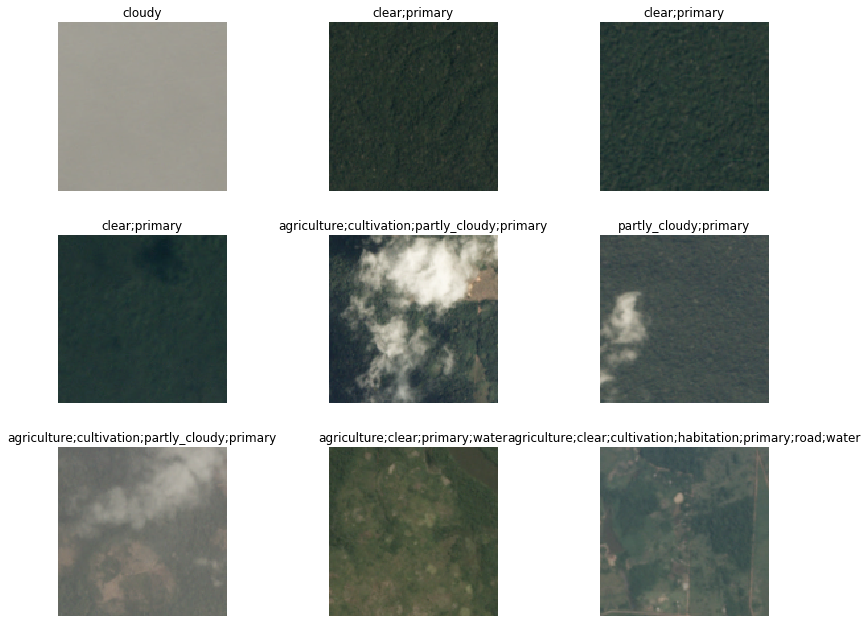

In [0]:
data.show_batch(rows=3,figsize=(12,9))

For example, to grab the planet data we would say:
- We've got a list of image files that are in a folder
- They're labeled based on a CSV with this name (train_v2.csv)
    - They have this separator () ﹣remember I showed you back here that there's a space between them. By passing in separator, it's going to create multiple labels.
    - The images are in this folder (train-jpg)
    - They have this suffix (.jpg)
- They're going to randomly spit out a validation set with 20% of the data
- We're going to create datasets from that, which we are then going to transform with these transformations (tfms)
- Then we're going to create a data bunch out of that, which we will then normalize using these statistics (imagenet_stats)

# Review Pytorch classes and fastai classes

So there's all these different steps. To give you a sense of what that looks like, the first thing I'm going to do is go back and explain what are all of the PyTorch and fastai classes you need to know about that are going to appear in this process. Because you're going to see them all the time in the fastai docs and PyTorch docs.

**Dataset (PyTorch)** [18:30](https://youtu.be/PW2HKkzdkKY?t=1110)

The first one you need to know about is a class called Dataset. The Dataset class is part of PyTorch and this is the source code for the Dataset class:

![alt text](https://github.com/hiromis/notes/raw/master/lesson3/16.png?raw=true)

As you can see, it actually does nothing at all. The Dataset class in PyTorch defines two things: `__getitem__` and `__len__`. In Python these special things that are "underscore underscore something underscore underscore" ﹣Pythonists call them "dunder" something. So these would be "dunder get items" and "dunder len". They're basically special magical methods with some special behavior. This particular method means that your object, if you had an object called O, it can be indexed with square brackets (e.g. O[3]). So that would call `__getitem__` with 3 as the index.

Then this one called `__len__` means that you can go len(o) and it will call that method. In this case, they're both not implemented. That is to say, although PyTorch says "in order to tell PyTorch about your data, you have to create a dataset", it doesn't really do anything to help you create the dataset. It just defines what the dataset needs to do. In other words, the starting point for your data is something where you can say:

What is the third item of data in my dataset (that's what `__getitem__` does)
How big is my dataset (that's what `__len__` does)
Fastai has lots of Dataset subclasses that do that for all different kinds of stuff. So far, you've been seeing image classification datasets. They are datasets where `__getitem__` will return an image and a single label of what is that image. So that's what a dataset is.

**DataLoader (PyTorch)** [20:37](https://youtu.be/PW2HKkzdkKY?t=1237)

Now a dataset is not enough to train a model. The first thing we know we have to do, if you think back to the gradient descent tutorial last week is we have to have a few images/items at a time so that our GPU can work in parallel. Remember we do this thing called a "mini-batch"? Mini-batch is a few items that we present to the model at a time that it can train from in parallel. To create a mini-batch, we use another PyTorch class called a DataLoader.

![alt text](https://github.com/hiromis/notes/raw/master/lesson3/17.png?raw=true)

A DataLoader takes a dataset in its constructor, so it's now saying "Oh this is something I can get the third item and the fifth item and the ninth item." It's going to:

- Grab items at random
- Create a batch of whatever size you asked for
- Pop it on the GPU
- Send it off to your model for you

You can see, already there are choices you have to make: what kind of dataset am I creating, what is the data for it, where it's going to come from. Then when I create my DataLoader: what batch size do I want to use.

**DataBunch (fastai)** [21:59](https://youtu.be/PW2HKkzdkKY?t=1319)

It still isn't enough to train a model, because we've got no way to validate the model. If all we have is a training set, then we have no way to know how we're doing because we need a separate set of held out data, a validation set, to see how we're getting along.

![alt text](https://github.com/hiromis/notes/raw/master/lesson3/18.png?raw=true)

For that we use a fastai class called a DataBunch. A DataBunch is something which binds together a training data loader (train_dl) and a valid data loader (valid_dl). When you look at the fastai docs when you see these mono spaced font things, they're always referring to some symbol you can look up elsewhere. In this case you can see train_dl is the first argument of DataBunch. There's no point knowing that there's an argument with a certain name unless you know what that argument is, so you should always look after the : to find out that is a DataLoader. So when you create a DataBunch, you're basically giving it a training set data loader and a validation set data loader. And that's now an object that you can send off to a learner and start fitting,

They're the basic pieces. Coming back to here, these are all the stuff which is creating the dataset:



```
data = (ImageList.from_csv(path,'train_v2.csv',folder='train-jpg',suffix='.jpg')
        #Where to find the data? -> in planet 'train' folder
       .split_by_rand_pct(0.2)
        #How to split in train/valid? -> randomly with the default 20% in valid
       .label_from_df(label_delim=' ')
        #How to label? -> use the second column of the csv file and split the tags by ' '
       .transform(tfms,size=128)
        #Data augmentation? -> use tfms with a size of 128
       .databunch()
        #Finally -> use the defaults for conversion to databunch
       .normalize(imagenet_stats))
```



# Data block API examples [23:56](https://youtu.be/PW2HKkzdkKY?t=1436)

Let's look at some examples of this data block API because once you understand the data block API, you'll never be lost for how to convert your dataset into something you can start modeling with.

[data_block.ipynb](https://github.com/fastai/fastai/blob/master/docs_src/data_block.ipynb)

In [0]:
from fastai.gen_doc.nbdoc import *
from fastai.basics import *
np.random.seed(42)

The data block API lets you customize the creation of a DataBunch by isolating the underlying parts of that process in separate blocks, mainly:

- Where are the inputs and how to create them?
- How to split the data into a training and validation sets?
- How to label the inputs?
- What transforms to apply?
- How to add a test set?
- How to wrap in dataloaders and create the DataBunch?

Each of these may be addressed with a specific block designed for your unique setup. Your inputs might be in a folder, a csv file, or a dataframe. You may want to split them randomly, by certain indices or depending on the folder they are in. You can have your labels in your csv file or your dataframe, but it may come from folders or a specific function of the input. You may choose to add data augmentation or not. A test set is optional too. Finally you have to set the arguments to put the data together in a DataBunch (batch size, collate function...)

The data block API is called as such because you can mix and match each one of those blocks with the others, allowing for a total flexibility to create your customized DataBunch for training, validation and testing. The factory methods of the various DataBunch are great for beginners but you can't always make your data fit in the tracks they require.

**MNIST**

Here are some examples of using the data block API. For example, if you're looking at MNIST (the pictures and classes of handwritten numerals), you can do something like this:

In [0]:
path = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)
path.ls()

[PosixPath('/root/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_tiny/test'),
 PosixPath('/root/.fastai/data/mnist_tiny/valid'),
 PosixPath('/root/.fastai/data/mnist_tiny/train'),
 PosixPath('/root/.fastai/data/mnist_tiny/models')]

In [0]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_tiny/train/3'),
 PosixPath('/root/.fastai/data/mnist_tiny/train/7')]

In [0]:
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=64)

This is a shortcut method which is aimed at data that is in folders following an ImageNet style, with the train and valid directories, each containing one subdirectory per class, where all the labelled pictures are. There is also a test directory containing unlabelled pictures.

Here is the same code, but this time using the data block API, which can work with any style of a dataset. All the stages, which will be explained below, can be grouped together like this:

In [0]:
data = (ImageList.from_folder(path) #where to find the data? -> in path and its subfolders
        .split_by_folder()          # How to split in train/valid? -> use the folders
        .label_from_folder()        # How to label? -> depending on the folder of the filenames
        .add_test_folder()          # Optionally add a test set (here default name is test)
        .transform(tfms,size=64)    # Data augmentation? -> use tfms with a size of 64
        .databunch()                # Finally? -> use the defaults for conversion to ImageDataBunch
       )

What kind of data set is this going to be?

- It's going to come from a list of image files which are in some folder.
- They're labeled according to the folder name that they're in.
- We're going to split it into train and validation according to the folder that they're in (train and valid).
- You can optionally add a test set. We're going to be talking more about test sets later in the course.
- We will then transform them using this set of transforms (tfms), and we're going to transform into something of this size (64).
- Then we're going to convert them into a data bunch.

So each of those stages inside these parentheses are various parameters you can pass to customize how that all works. But in the case of something like this MNIST dataset, all the defaults pretty much work, so this is all fine.

In [0]:
data.train_ds[0]

(Image (3, 64, 64), Category 3)

Here it is. `data.train_ds` is the dataset (not the data loader) so I can actually index into it with a particular number. So here is the zero indexed item in the training data set: it's got an image and a label.

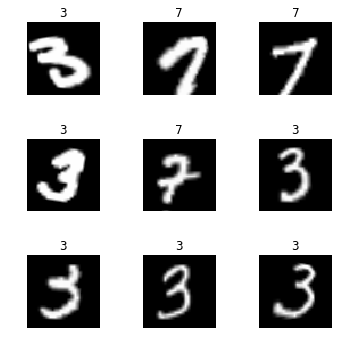

In [0]:
data.show_batch(rows=3, figsize=(5,5))

We can show batch to see an example of the pictures of it. And we could then start training.

In [0]:
data.valid_ds.classes

['3', '7']

Here are the classes that are in that dataset. This little cut-down sample of MNIST has 3's and 7's.

**Planet** [26:01](https://youtu.be/PW2HKkzdkKY?t=1561)

Here's an example of using planet dataset. This is actually again a little subset of planet we use to make it easy to try things out.

This time, it's a multiclassification problem with the labels in a csv file and no given split between valid and train data, so we use a random split. The factory method is:

In [0]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True,max_lighting=0.1,max_zoom=1.05,max_warp=0.)


In [0]:
planet.ls()

[PosixPath('/root/.fastai/data/planet_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/planet_tiny/train')]

In [0]:
pd.read_csv(planet/'labels.csv').head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [0]:
data = ImageDataBunch.from_csv(planet,folder='train',size=128,suffix='.jpg',label_delim=' ',ds_tfms=planet_tfms)

With the data block API we can rewrite this like that:

In [0]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train',suffix='.jpg') 
        #Where to find the data ? in planet and its subfolders
        # How to label? ->use the csv file labels.csv in path,
        # add .jpg to the names and take them in the folder train
        .split_by_rand_pct()
        # How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(label_delim=' ')
        # How to label? -> use the second column of the csv file and split the tags by ' '
        .transform(planet_tfms,size=128)
        # Data augmentation? -> use tfms with a size of 128
        .databunch()
        #finally -> use the defaults for conversion to databunch
        )

In this case:

- Again, it's an ImageFileList
- We are grabbing it from a folder
- This time we're labeling it based on a CSV file
- We're randomly splitting it (by default it's 20%)
- Transforming it using these transforms (planet_tfms), we're going to use a smaller size (128).
- Then create a data bunch

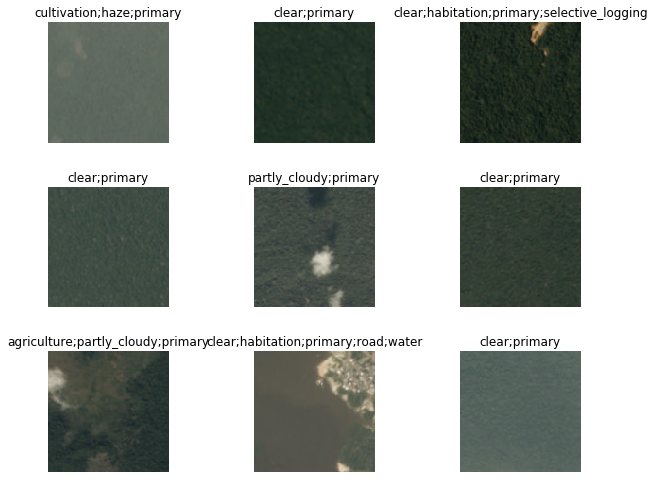

In [0]:
data.show_batch(rows=3,figsize=(9,7))

There it is. Data bunches know how to draw themselves amongst other things.

**CAMVID** [26:38]

The data block API also allows you to get your data together in problems for which there is no direct ImageDataBunch factory method. For a segmentation task, for instance, we can use it to quickly get a DataBunch. Let's take the example of the camvid dataset. The images are in an 'images' folder and their corresponding mask is in a 'labels' folder.

In [0]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'


In [0]:
camvid.ls()

[PosixPath('/root/.fastai/data/camvid_tiny/codes.txt'),
 PosixPath('/root/.fastai/data/camvid_tiny/images'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels')]

In [0]:
path_img.ls()[:10]

[PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_06300.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0006R0_f00960.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/Seq05VD_f01260.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_06870.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0001TP_008670.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0001TP_006840.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_02250.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0006R0_f03180.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_06240.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/images/0006R0_f01710.png')]

In [0]:
path_lbl.ls()[:10]

[PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_06870_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f01320_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_07973_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_08009_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0001TP_008400_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0001TP_008160_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_08093_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0006R0_f03330_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/0006R0_f03720_P.png'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f02940_P.png')]

We have a file that gives us the names of the classes (what each code inside the masks corresponds to: a pedestrian, a tree, a road...)

In [0]:
codes = np.loadtxt(camvid/'codes.txt',dtype=str);codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

And we define the following function that infers the mask filename from the image filename.

In [0]:
get_y_fn = lambda x:path_lbl/f'{x.stem}_P{x.suffix}' ; get_y_fn

<function __main__.<lambda>>

Then we can easily define a DataBunch using the data block API. Here we need to use tfm_y=True in the transform call because we need the same transforms to be applied to the target mask as were applied to the image.

In [0]:
data = (SegmentationItemList.from_folder(path_img)
        #Where to find the data? -> in path_img and its subfolders
        .split_by_rand_pct()
        # How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_fn,classes=codes)
        # How to labels? -> use the label function on the filename of the data
        .transform(get_transforms(), tfm_y=True, size=128)
        # Data augmentation? -> use tfms with a size of 128, also transform the label images
        .databunch()
        # Finally-> use the defaults for conversion to databunch
       )

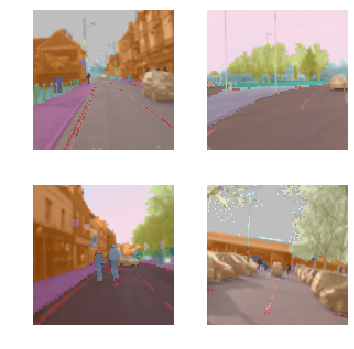

In [0]:
data.show_batch(rows=2,figsize=(5,5))

What if we look at this data set called CAMVID? CAMVID looks like this. It contains pictures and every pixel in the picture is color coded. So in this case :

- We have a list of files in a folder.
- Randomly split it in some way
- We're going to label them using a function. So this function (get_y_fn) is basically the thing which tells it whereabouts of the color coding for each pixel. It's in a different place.
- Some transforms.
- Create a data bunch. You can optionally pass in things like what batch size do you want.

Again, it knows how to draw itself and you can start learning with that.

**COCO** [27:41](https://youtu.be/PW2HKkzdkKY?t=1661)

One more example. What if we wanted to create something like this:

![alt text](https://github.com/hiromis/notes/blob/master/lesson3/22.png?raw=true)

This is call an object detection dataset. Again, we've got a little minimal COCO dataset. COCO is the most famous academic dataset for object detection.

We use our tiny sample of the COCO dataset here. There is a helper function in the library that reads the annotation file and returns the list of images names with the list of labelled bboxes associated to it. We convert it to a dictionary that maps image names with their bboxes and then write the function that will give us the target for each image filename.


In [0]:
coco = untar_data(URLs.COCO_TINY)

In [0]:
coco.ls()

[PosixPath('/root/.fastai/data/coco_tiny/train.json'),
 PosixPath('/root/.fastai/data/coco_tiny/train')]

In [0]:
images, lbl_bbox = get_annotations(coco/'train.json')
images[:5],lbl_bbox[:5]

(['000000542959.jpg',
  '000000129739.jpg',
  '000000153607.jpg',
  '000000329258.jpg',
  '000000452866.jpg'],
 [[[[86.34, 32.52, 95.75, 41.050000000000004],
    [110.52, 98.12, 114.59, 100.07000000000001],
    [51.62, 91.28, 57.339999999999996, 95.23],
    [110.82, 110.48, 126.03999999999999, 125.03],
    [50.18, 96.63, 63.64, 115.3],
    [111.73, 0.69, 124.79, 12.49]],
   ['chair', 'vase', 'vase', 'chair', 'chair', 'chair']],
  [[[60.71, 118.42, 77.52, 128.0],
    [71.43, 30.3, 96.9, 83.65],
    [85.58, 9.16, 108.1, 67.82],
    [44.69, 102.35, 50.269999999999996, 106.94],
    [57.16, 94.63, 59.449999999999996, 99.56],
    [60.12, 97.58, 65.83, 102.0],
    [71.0, 93.8, 73.62, 102.63],
    [86.13, 64.27, 92.39999999999999, 77.44999999999999],
    [86.11, 74.08, 90.73, 85.3],
    [89.92, 83.35, 96.53, 98.47],
    [44.46, 96.46, 50.99, 99.67999999999999],
    [54.78, 102.87, 59.07, 106.22],
    [94.51, 79.45, 98.65, 86.97],
    [87.0, 69.3, 89.43, 73.89],
    [43.85, 93.8, 50.92, 97.2],


In [0]:
img2bbox = dict(zip(images,lbl_bbox));
img2bbox['000000005906.jpg'] #see the dic of the first image

[[[11.84, 0.26, 98.75, 83.49000000000001],
  [91.56, 51.14, 104.94, 63.68],
  [80.86, 61.19, 93.78, 74.38],
  [98.25, 42.05, 113.16, 56.48],
  [82.7, 59.99, 96.3, 73.3],
  [82.31, 64.57, 92.55, 74.72999999999999],
  [102.03, 41.29, 115.19, 55.22],
  [108.57, 43.88, 117.99, 52.72],
  [85.32, 57.29, 100.11999999999999, 70.39],
  [111.54, 0.09, 128.0, 36.6],
  [42.48, 117.12, 51.04, 127.99000000000001],
  [90.1, 53.25, 102.77, 64.98]],
 ['tv',
  'book',
  'book',
  'book',
  'book',
  'book',
  'book',
  'book',
  'book',
  'couch',
  'remote',
  'book']]

In [0]:
get_y_func=lambda o:img2bbox[o.name]

The following code is very similar to what we saw before. The only new addition is the use of a special function to collate the samples in batches. This comes from the fact that our images may have multiple bounding boxes, so we need to pad them to the largest number of bounding boxes.

In [0]:
data = (ObjectItemList.from_folder(coco)
       #Where are the images? -> in coco and its subfolders
        .split_by_rand_pct()
        #How to split in train/valid?->randomly with the default 20% in valid
        .label_from_func(get_y_func)
        #How to find the labels? use get_y_func on the file name of the data
        .transform(get_transforms(),tfm_y=True)
        #Data augmentation?-> Standard transforms; also transform the label images
        .databunch(bs=16,collate_fn=bb_pad_collate)
        #Finally we convert to a Databunch, use a batch size of 16,
        # and we use bb_pad_collate to collate the data into a mini-batch
       )

We can create it using the same process:

- Grab a list of files from a folder.
- Label them according to this little function (get_y_func).
- Randomly split them.
- Create a data bunch. In this case you have to use generally smaller batch sizes or you'll run out of memory. And you have to use something called a "collation function".

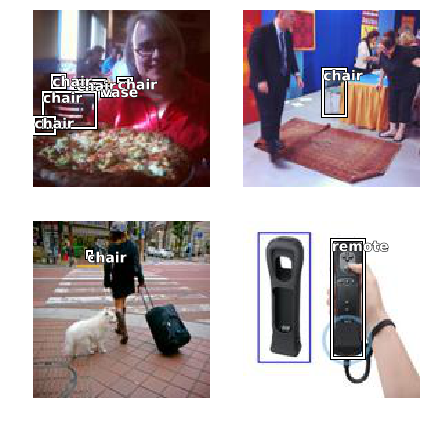

In [0]:
data.show_batch(rows=2,ds_type=DatasetType.Valid, figsize=(6,6))

Once that's all done we can again show it and here is our object detection data set. So you get the idea. So here's a really convenient notebook. Where will you find this? Ah, this notebook is the documentation. Remember how I told you that all of the documentation comes from notebooks? You'll find them in [fastai repo in docs_src](https://github.com/fastai/fastai/tree/master/docs_src) . This which you can play with and experiment with inputs and outputs, and try all the different parameters, you will find the[ data block API examples of use](https://github.com/fastai/fastai/blob/master/docs_src/data_block.ipynb), if you go to the documentation here it is - the [data block API examples of use](https://docs.fast.ai/data_block.html#Examples-of-use).

Everything that you want to use in fastai, you can look it up in the documentation. There is also search functionality available:

![alt text](https://github.com/hiromis/notes/raw/master/lesson3/23.png?raw=true)

So once you find some documentation that you actually want to try playing with yourself, just look up the name (e.g. **data_block.html**) and then you can open up a notebook with the same name (e.g. data_block.ipynb) in the fastai repo and play with it yourself.

#Back to Creating satellite image data bunch [29:35](https://youtu.be/PW2HKkzdkKY?t=1775)

That was a quick overview of this really nice data block API, and there's lots of documentation for all of the different ways you can label inputs, split data, and create datasets. So that's what we're using for planet.

In the documentation, these two steps were all joined up together:




In [0]:
path ='/content/data/planet/'

In [0]:
tfms = get_transforms(flip_vert=True,max_lighting=0.1,max_zoom=1.05,max_warp=0.)

In [0]:
np.random.seed(42)
src =(ImageList.from_csv(path,'train_v2.csv',folder='train-jpg',suffix='.jpg')
     .split_by_rand_pct(0.2)
     .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms,size=128)
       .databunch().normalize(imagenet_stats))

We can certainly do that here too, but you'll learn in a moment why it is that we're actually splitting these up into two separate steps which is also fine as well.

A few interesting points about this.

- **Transforms:** Transforms by default will flip randomly each image, but they'll actually randomly only flip them horizontally. If you're trying to tell if something is a cat or a dog, it doesn't matter whether it's pointing left or right. But you wouldn't expect it to be upside down. On the other hand for satellite imagery whether something's cloudy or hazy or whether there's a road there or not, could absolutely be flipped upside down. There's no such thing as a right way up from space. So **flip_vert which defaults to False, we're going to flip over to True** to say you should actually do that. And it doesn't just flip it vertically, it actually tries each possible 90-degree rotation (i.e. there are 8 possible symmetries that it tries out).

- **Warp** (max_warp): Perspective warping is something which very few libraries provide, and those that do provide it it tends to be really slow. I think fastai is the first one to provide really fast perspective warping. Basically, the reason this is interesting is if I look at you from below versus above, your shape changes. So when you're taking a photo of a cat or a dog, sometimes you'll be higher, sometimes you'll be lower, then that kind of change of shape is certainly something that you would want to include as you're creating your training batches. You want to modify it a little bit each time. Not true for satellite images. A satellite always points straight down at the planet. So if you added perspective warping, you would be making changes that aren't going to be there in real life. So I turn that off.

This is all something called **data augmentation**. We'll be talking a lot more about it later in the course. But you can start to get a feel for the kind of things that you can do to augment your data. **In general, maybe the most important one is if you're looking at astronomical data, pathology digital slide data, or satellite data where there isn't really an up or down, turning on flip verticals true is generally going to make your models generalize better**.


**Creating multi-label classifier** [35:59](https://youtu.be/PW2HKkzdkKY?t=1979)

Now to create a multi-label classifier that's going to figure out for each satellite tile what's the weather and what else can I see in it, there's basically nothing else to learn. Everything else that you've already learned is going to be exactly nearly the same.

To create a Learner we use the same function as in lesson 1. Our base architecture is resnet34 again, but the metrics are a little bit differeent: we use accuracy_thresh instead of accuracy. **In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. accuracy_thresh selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.**

In [0]:
arch = models.resnet50

In [0]:
acc_02 = partial(accuracy_thresh,thresh=0.2)
f_score = partial(fbeta,thresh=0.2)
learn = cnn_learner(data,arch,metrics=[acc_02,f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 82826204.14it/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Find the thing with the steepest slope ﹣so somewhere around 1e-2, make that our learning rate.

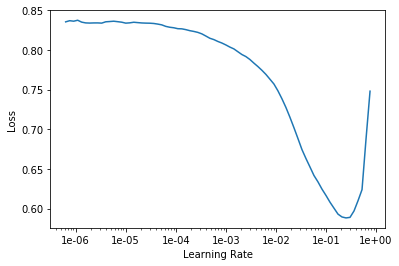

In [0]:
learn.recorder.plot()

In [0]:
lr=0.01

In [0]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.123034,0.109862,0.942245,0.904174,04:00
1,0.108455,0.097153,0.953348,0.916357,03:53
2,0.102596,0.091824,0.953094,0.919979,03:50
3,0.095151,0.088260,0.957570,0.923927,03:49
4,0.091184,0.086893,0.957672,0.924761,03:50


Here it's printing out accuracy and this other metric called **fbeta**. If you're trying to figure out how to do a better job with your model, changing the metrics will never be something that you need to do. They're just to show you how you're doing.

You can have one metric, no metrics, or a list of multiple metrics to be printed out as your models training. In this case, I want to know two things:

1. The accuracy.
2. How would I do on Kaggle.

Kaggle told me that I'm going to be judged on a particular metric called the F score. I'm not going to bother telling you about the F score﹣it's not really interesting enough to be worth spending your time on. But it's basically this. When you have a classifier, you're going to have some false positives and some false negatives. How do you weigh up those two things to create a single number? There's lots of different ways of doing that and something called the F score is a nice way of combining that into a single number. And there are various kinds of F scores: F1, F2 and so forth. **And Kaggle said in the competition rules, we're going to use a metric called F2.**

![alt text](https://github.com/hiromis/notes/raw/master/lesson3/24.png?raw=true)

We have a metric called fbeta. In other words, it's F with 1, 2, or whatever depending on the value of beta. We can have a look at its signature and it has a threshold and a beta. The beta is 2 by default, and Kaggle said that they're going to use F 2 so I don't have to change that.

**But there's one other thing that I need to set which is a threshold.-->(important)**

What does that mean? Here's the thing. Do you remember we had a little look the other day at the source code for the accuracy metric? And we found that it used this thing called argmax. The reason for that was we had this input image that came in, it went through our model, and at the end it came out with a table of ten numbers. This is if we're doing MNIST digit recognition and the ten numbers were the probability of each of the possible digits. Then we had to look through all of those and find out which one was the biggest. So the function in Numpy, PyTorch, or just math notation that finds the biggest in returns its index is called argmax.

To get the accuracy for our pet detector, we use this accuracy function called argmax to find out which class ID pet was the one that we're looking at. Then it compared that to the actual, and then took the average. That was the accuracy.

[37:23](https://youtu.be/PW2HKkzdkKY?t=2243)

We can't do that for satellite recognition because there isn't one label we're looking for﹣there's lots. A data bunch has a special attribute called c and c is going to be how many outputs do we want our model to create. For any kind of classifier, we want one probability for each possible class. In other words, **data.c** for classifiers is always going to be equal to the length of **data.classes**.




In [0]:
data.c

17

In [0]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

They are the 17 possibilities. So we're going to have one probability for each of those. **But then we're not just going to pick out one of those 17, we're going to pick out n of those 17**. So what we do is, we compare each probability to some threshold. Then we say anything that's higher than that threshold, we're going to assume that the models saying it does have that feature. So we can pick that threshold.

![alt text](https://github.com/hiromis/notes/raw/master/lesson3/26.png?raw=true)

I found that for this particular dataset, a threshold of 0.2 seems to generally work pretty well. This is the kind of thing you can easily just experiment to find a good threshold. So I decided I want to print out the accuracy at a threshold of 0.2.

The normal accuracy function doesn't work that way. It doesn't **argmax**. We have to use a different accuracy function called **accuracy_thresh**. That's the one that's going to compare every probability to a threshold and return all the things higher than that threshold and compare accuracy that way.

![alt text](https://github.com/hiromis/notes/raw/master/lesson3/27.png?raw=true)

**Python3 partial** [39:17](https://youtu.be/PW2HKkzdkKY?t=2357?raw=true)

One of the things we had passed in is thresh. Now of course our metric is going to be calling our function for us, so we don't get to tell it every time it calls back what threshold do we want, so we really want to create a special version of this function that always uses a threshold of 0.2. One way to do that would be defining a function **acc_02** as below:

```
def acc_02(inp, targ): return accuracy_thresh(inp, targ, thresh=0.2)
```

We could do it that way. But it's so common that computer science has a term for that called a "partial" / "partial function application" (i.e. create a new function that's just like that other function but we are always going to call it with a particular parameter).

Python3 has something called **partial** that takes some function and some list of keywords and values, and creates a new function that is exactly the same as this function (accuracy_thresh) but is always going to call it with that keyword argument (thresh=0.2).

```
acc_02 = partial(accuracy_thresh, thresh=0.2)
```

This is a really common thing to do particularly with the fastai library because there's lots of places where you have to pass in functions and you very often want to pass in a slightly customized version of a function so here's how you do it.

Similarly, **fbeta** with **thresh=0.2**:



```
acc_01 = partial(accuracy_thresh,thresh=0.2)
f_score = partial(fbeta,thresh=0.2)
learn = cnn_learner(data,arch,metrics=[acc_01,f_score])
```



```
epoch	train_loss	valid_loss	accuracy_thresh	fbeta	time
    0	0.123034	   0.109862	    0.942245	  0.904174	04:00
    1	0.108455	   0.097153	    0.953348	  0.916357	03:53
    2	0.102596	   0.091824	    0.953094	  0.919979	03:50
    3	0.095151	   0.088260	    0.957570	  0.923927	03:49
    4	0.091184	   0.086893	    0.957672	  0.924761	03:50
```

So we've got an accuracy of about 96% and F beta of about 0.924 and so you could then go and have a look at [Planet private leaderboard](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/leaderboard). The top 50th is about 0.93 so we kind of say like oh we're on the right track. So as you can see, once you get to a point that the data is there, there's very little extra to do most of the time.

**Question**: When your model makes an incorrect prediction in a deployed app, is there a good way to “record” that error and use that learning to improve the model in a more targeted way? [42:01](https://youtu.be/PW2HKkzdkKY?t=2522)

- That's a great question. The first bit﹣is there a way to record that? Of course there is. You record it. That's up to you. Maybe some of you can try it this week. You need to have your user tell you that you were wrong. This Australian car you said it was a Holden and actually it's a Falcon. So first of all. you'll need to collect that feedback and the only way to do that is to ask the user to tell you when it's wrong. So you now need to record in some log somewhere﹣something saying you know this was the file, I've stored it here, this was the prediction I made, this was the actual that they told me. Then at the end of the day or at the end of the week, you could set up a little job to run something or you can manually run something. What are you going to do? You're going to do some fine-tuning. What does fine-tuning look like? Good segue Rachel! It looks like this.

So let's pretend here's your saved model:







In [0]:
learn.save('stage-1-rn50')

Then we unfreeze to fine-tune the whole model:

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


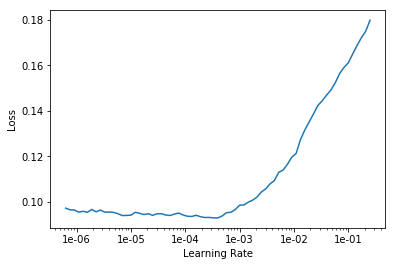

In [0]:
learn.lr_find()
learn.recorder.plot()

Then we fit a little bit more. Now in this case, I'm fitting with my original dataset. But you could create a new data bunch with just the misclassified instances and go ahead and fit. The misclassified ones are likely to be particularly interesting. So you might want to fit at a slightly higher learning rate to make them really mean more or you might want to run them through a few more epochs. But it's exactly the same thing. You just call fit with your misclassified examples and passing in the correct classification. That should really help your model quite a lot.

There are various other tweaks you can do to this but that's the basic idea.

In [0]:
learn.fit_one_cycle(5,slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.096377,0.089594,0.954794,0.922392,04:29
1,0.096499,0.089244,0.953748,0.923910,04:32
2,0.092885,0.085451,0.957417,0.925155,04:36
3,0.085208,0.083104,0.957534,0.928355,04:37
4,0.081077,0.082652,0.958900,0.929013,04:34


In [0]:
learn.save('stage-2-r50')

**Question**: Could someone talk a bit more about the data block ideology? I'm not quite sure how the blocks are meant to be used. Do they have to be in a certain order? Is there any other library that uses this type of programming that I could look at? [44:01](https://youtu.be/PW2HKkzdkKY?t=2641)

Yes, they do have to be in a certain order and it's basically the order that you see in the [example of use](https://docs.fast.ai/data_block.html#Examples-of-use).



```
data = (ImageList.from_folder(path)
                # where to find data? -> in path and its subfolders
                .split_by_folder()
                #How to split in train/valid?-> use the folders
                .label_from_folder()
                #How to label? -> depending on the folder of the filenames
                .add_test_folder()
                # Optionally add a test set (here default name is test)
                .transform(tfms,size=64)
                # Data augmentation? -> use tfms with a size of 64
                .databunch()
                # Finally? -> use defaults for conversion to ImageDataBunch
                )
                
```

- What kind of data do you have?
- Where does it come from?
- How do you split it?
- How do you label it?
- What kind of datasets do you want?
- Optionally, how do I transform it?
- How do I create a data bunch from?

They're the steps. We invented this API. I don't know if other people have independently invented it. The basic idea of a pipeline of things that dot into each other is pretty common in a number of places﹣not so much in Python, but you see it more in JavaScript. Although this kind of approach of each stage produces something slightly different, you tend to see it more in like ETL software (extraction transformation and loading software) where this particular stages in a pipeline. It's been inspired by a bunch of things. But all you need to know is to use this example to guide you, and then look up the documentation to see which particular kind of thing you want. In this case, the **ImageList**, you're actually not going to find the documentation of **ImageList** in datablocks documentation because this is specific to the vision application. So to then go and actually find out how to do something for your particular application, you would then go to look at text, vision, and so forth. That's where you can find out what are the datablock API pieces available for that application.

Of course, you can then look at the source code if you've got some totally new application. You could create your own "part" of any of these stages. Pretty much all of these functions are very few lines of code. Maybe we could look an example of one. Let's try.



```
ImageList.from_csv??
------------------------
Signature: ImageList.from_csv(path:Union[pathlib.Path, str], csv_name:str, header:str='infer', **kwargs) -> 'ItemList'
Source:   
    @classmethod
    def from_csv(cls, path:PathOrStr, csv_name:str, header:str='infer', **kwargs)->'ItemList':
        "Get the filenames in `path/csv_name` opened with `header`."
        path = Path(path)
        df = pd.read_csv(path/csv_name, header=header)
        return cls.from_df(df, path=path, **kwargs)
File:      /usr/local/lib/python3.6/dist-packages/fastai/vision/data.py
Type:      method
```

You can look at the documentation to see exactly what that does. As you can see, most fastai functions are no more than a few lines of code. They're normally pretty straightforward to see what are all the pieces there and how can you use them. It's probably one of these things that, as you play around with it, you'll get a good sense of how it all gets put together. But if during the week there are particular things where you're thinking I don't understand how to do this please let us know and we'll try to help you.

**Question**: What resources do you recommend for getting started with video? For example, being able to pull frames and submit them to your model. [47:39](https://youtu.be/PW2HKkzdkKY?t=2859)

- The answer is it depends. If you're using the web which I guess probably most of you will be then there's web API's that basically do that for you. So you can grab the frames with the web API and then they're just images which you can pass along. If you're doing a client side, I guess most people would tend to use OpenCV for that. But maybe during the week, people who are doing these video apps can tell us what have you used and found useful, and we can start to prepare something in the lesson wiki with a list of video resources since it sounds like some people are interested.

**How to choose good learning rates** [48:50](https://youtu.be/PW2HKkzdkKY?t=2930)

One thing to notice here is that before we unfreeze you'll tend to get this shape pretty much all the time:

![alt text](https://github.com/hiromis/notes/blob/master/lesson3/n1.png?raw=true)

If you do your learning rate finder before you unfreeze. It's pretty easy ﹣ **find the steepest slope, not the bottom**. Remember, we're trying to find the bit where we can like slide down it quickly. So if you start at the bottom it's just gonna send you straight off to the end here.

Then we can call it again after you unfreeze, and you generally get a very different shape.

[49:24](https://youtu.be/PW2HKkzdkKY?t=2964)

This is a little bit harder to say what to look for because it tends to be this kind of shape where you get a little bit of upward and then it kind of very gradual downward and then up here. So I tend to kind of look for just before it shoots up and go back about 10x as a kind of a rule of thumb. So 1e-5. That is what I do for the first half of my slice. And then for the second half of my slice, I normally do whatever learning rate are used for the the frozen part. So lr which was 0.01 kind of divided by five or ten. Somewhere around that. That's my rule of thumb:

- Look for the bit kind of at the bottom, find about 10x smaller, that's the number that I put as the first half of my slice.
- **lr/5 or lr/10** is kind of what I put as the second half of my slice.

**This is called discriminative learning rates** as the course continues.


**Making the model better** [50:30](https://youtu.be/PW2HKkzdkKY?t=3030)

How am I going to get this better? We want to get into the top 10% which is going to be about 0.929-ish. So we're not quite there (0.9288).

So here's the trick [51:01](https://youtu.be/PW2HKkzdkKY?t=3061). When I created my dataset, I put **size=128** and actually the images that Kaggle gave us are 256. I used the size of 128 partially because I wanted to experiment quickly. It's much quicker and easier to use small images to experiment. But there's a second reason. I now have a model that's pretty good at recognizing the contents of 128 by 128 satellite images. So what am I going to do if I now want to create a model that's pretty good at 256 by 256 satellite images? Why don't I use transfer learning? Why don't I start with the model that's good at 128 by 128 images and fine-tune that? So don't start again. That's actually going to be really interesting because if I trained quite a lot and I'm on the verge of overfitting then I'm basically creating a whole new dataset effectively﹣one where my images are twice the size on each axis right so four times bigger. So it's really a totally different data set as far as my convolutional neural networks concerned. So I got to lose all that overfitting. I get to start again. Let's keep our same learner but use a new data bunch where the data bunch is 256 by 256. That's why I actually stopped here before I created my data sets:


```
np.random.seed(42)
src =(ImageList.from_csv(path,'train_v2.csv',folder='train-jpg',suffix='.jpg')
     .split_by_rand_pct(0.2)
     .label_from_df(label_delim=' '))
     
data = (src.transform(tfms,size=128)
           .databunch().normalize(imagenet_stats))
```

Because I'm going to now take this this data source (src) and I'm going to create a new data bunch with 256 instead. So let's have a look at how we do that.


In [0]:
data = (src.transform(tfms,size=256)
           .databunch().normalize(imagenet_stats))

So here it is. Take that source, transform it with the same transforms as before but this time use size 256. That should be better anyway because this is going to be higher resolution images. But also I'm going to start with this kind of pre-trained model (I haven't got rid of my learner it's the same learner I had before).

I'm going to replace the data inside my learner with this new data bunch.

In [72]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
learn.freeze()

Then I will freeze again (i.e. I'm going back to just training the last few layers) and I will do a new lr_find().

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


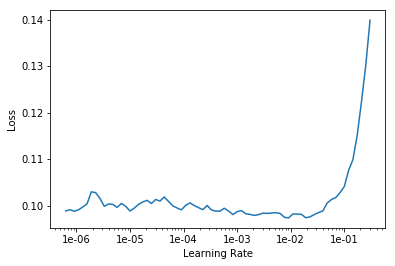

In [74]:
learn.lr_find()
learn.recorder.plot()

Because I actually now have a pretty good model (it's pretty good for 128 by 128 so it's probably gonna be like at least okay for 256 by 256), I don't get that same sharp shape that I did before. But I can certainly see where it's way too high. So I'm gonna pick something well before where it's way too high. Again maybe 10x smaller. So here I'm gonna go 1e-2/2 ﹣ that seems well before it shoots up.

In [0]:
lr = 1e-2/2

So let's fit a little bit more

In [76]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.087472,0.085219,0.956945,0.927719,11:04
1,0.088821,0.086208,0.955739,0.924844,10:59
2,0.084001,0.083309,0.958805,0.925297,11:01
3,0.081803,0.081499,0.957810,0.930422,10:51
4,0.080586,0.081318,0.959496,0.930573,10:49


We are frozen again so we're just training the last few layers and fit a little bit more. As you can see, I very quickly remember 0.928 was where we got to before after quite a few epochs. We're straight up there and suddenly we've passed 0.93. So we're now already into the top 10%. So we've hit our first goal. We're, at the very least, pretty confident at the problem of recognizing satellite imagery.

In [0]:
learn.save('stage-1-256-rn50')

But of course now, we can do the same thing as before. We can unfreeze and train a little more.

In [0]:
learn.unfreeze()

Again using the same kind of approach I described before, lr/5 on the right and even smaller one on the left.

In [79]:
learn.fit_one_cycle(5,slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.085127,0.085482,0.960171,0.926492,14:11
1,0.086323,0.084541,0.957134,0.928471,14:08
2,0.084616,0.082964,0.957817,0.928234,14:10
3,0.077480,0.081129,0.959409,0.931832,14:10
4,0.075577,0.080699,0.959597,0.930829,14:10


Train a little bit more. 0.9314 so that's actually pretty good﹣somewhere around top 25ish. Actually when my friend Brendan and I entered this competition we came 22nd with 0.9315 and we spent (this was a year or two ago) months trying to get here. **So using pretty much defaults with the minor tweaks and one trick which is the resizing tweak you can get right up into the top of the leaderboard of this very challenging competition**. Now I should say we don't really know where we'd be﹣we would actually have to check it on the test set that Kaggle gave us and actually submit to the competition which you can do. You can do a late submission. So later on in the course, we'll learn how to do that. But we certainly know we're doing very well so that's great news.

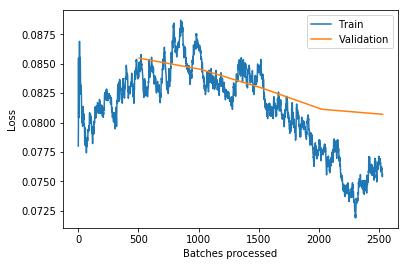

In [80]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

You can see as I kind of go along I tend to save things. You can name your models whatever you like but I just want to basically know is it before or after the unfreeze (stage 1 or 2), what size was I training on, what architecture was I training on. That way I could have always go back and experiment pretty easily. So that's planet. Multi label classification.

In [0]:
learn.export()